# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
#Import all the necessary modules
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [2]:
wine= pd.read_csv("winequality-red.csv")
wine.head(10)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [3]:
wine.sample()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
643            9.5              0.59         0.44             2.3      0.071   

     free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
643                 21.0                  68.0   0.9992  3.46       0.63   

     alcohol  quality  
643      9.5        5

# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
print(wine.dtypes)

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [5]:
print(wine.shape)

(1599, 12)


# Q4 Print the descriptive statistics of each & every column using describe() function

In [6]:
wine.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

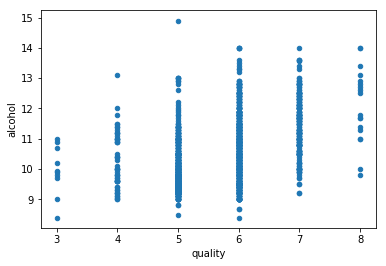

In [7]:
wine.plot.scatter(x='quality', y='alcohol')

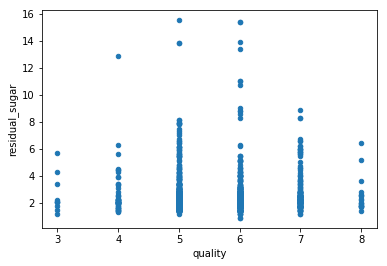

In [8]:
wine.plot.scatter(x='quality', y='residual_sugar')

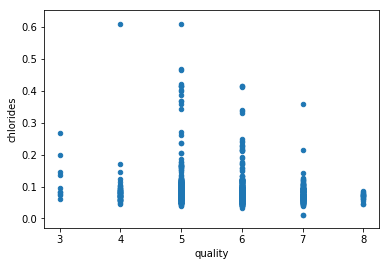

In [9]:
wine.plot.scatter(x='quality', y='chlorides')

All Samples are Acidic in Nature and only differ very minimally, but the the higher quality wines haves less SUGAR and Chloride Content but higher Alcohol content in them  hence the higer grade wines can be assumed as having Higer Price Points.

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


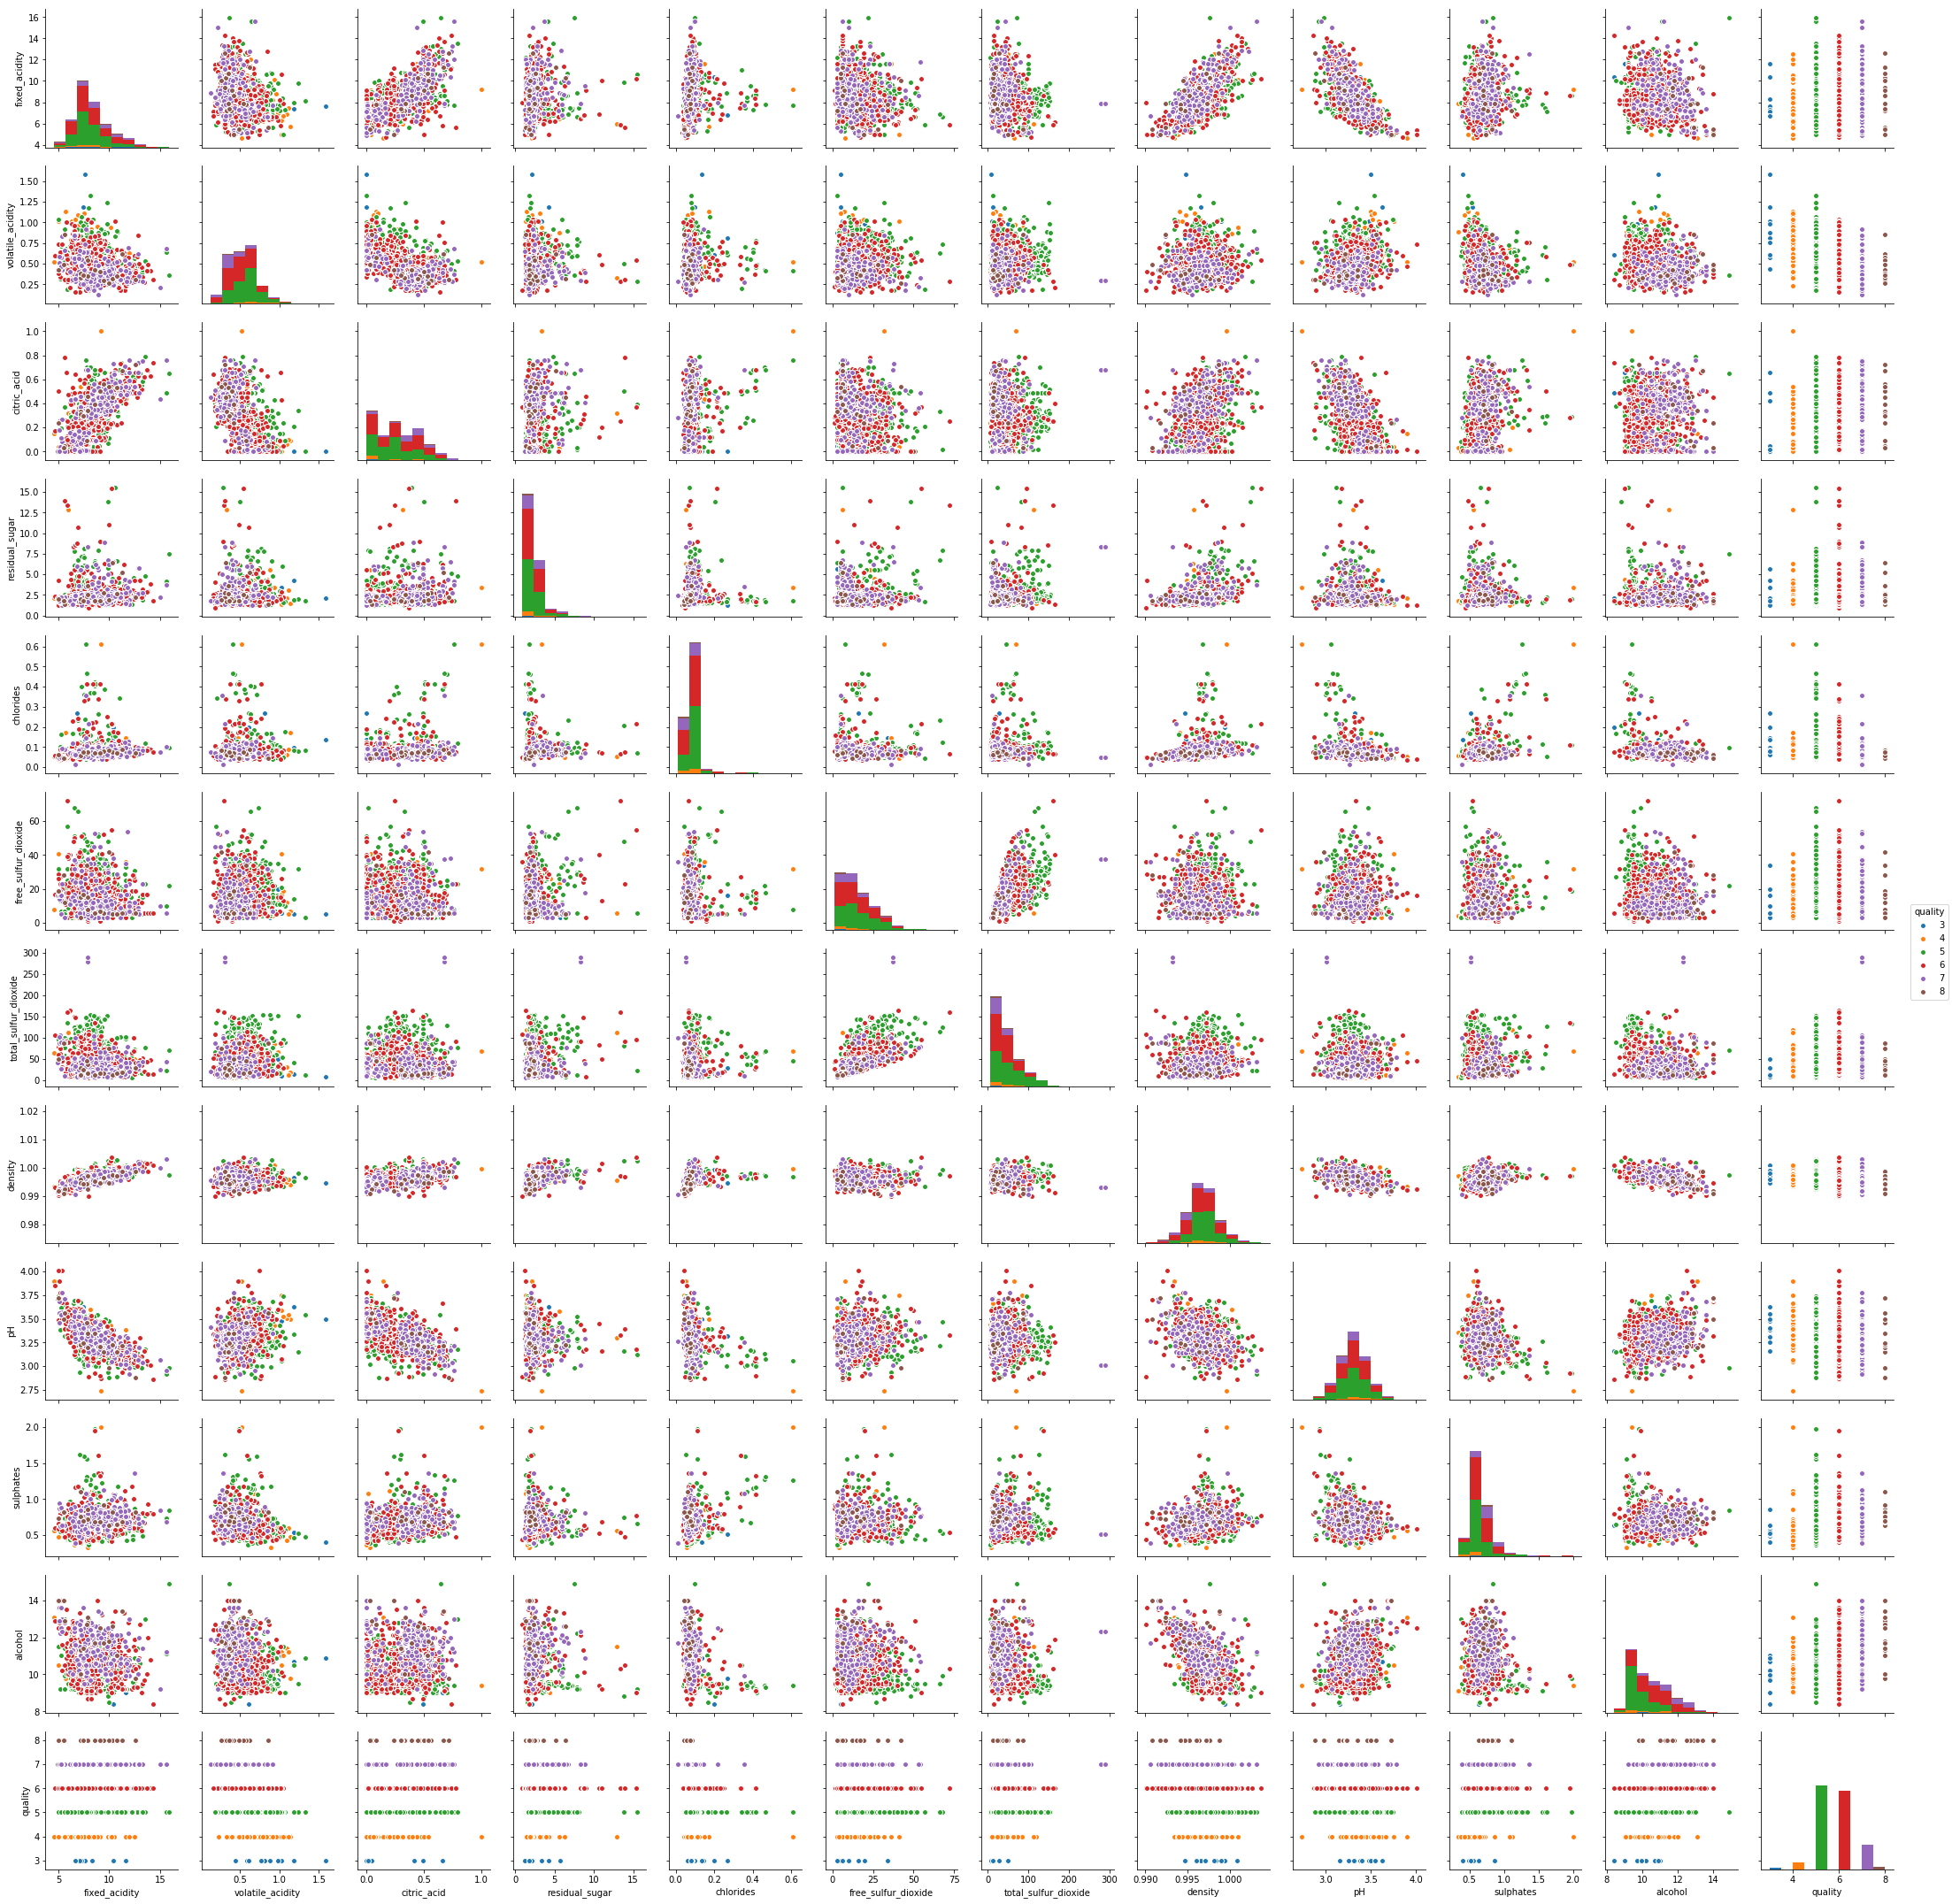

In [10]:
#Analyzing using PairPlots for Variable Collinearity and Coherences.
sns.pairplot(wine, hue = "quality")
#1.Alchohol level increases as the Quality of the wine increases.
#2.Higher Quality wines have less Sugar content in them.
#3.Higher Quality wines have less chloride content in them as well.

# Q7 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [11]:
arr = wine.values
X = arr[:,0:11]
Y = arr[:,11]
test_size = 0.30
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [12]:
X_train = wine.head(1119)
X_test = wine.tail(480)
y_train = X_train.pop("quality")
y_test = X_test.pop("quality")
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q9 Print the accuracy of the model & print the confusion matrix 

In [18]:
#print("Train SET"dt_model.score(X_train , y_train))
print("Model Accuracy using Test data",dt_model.score(X_test,y_test))
y_predict = dt_model.predict(X_test)
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_predict))

Model Accuracy using Test data 0.5020833333333333
Confusion Matrix: [[  1   0   3   0   1   0]
 [  1   2  11   7   0   0]
 [  2   9  97  70  10   0]
 [  0   7  64 118  26   3]
 [  0   0   4  15  23   0]
 [  0   0   0   4   2   0]]


# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [19]:
regularized_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
regularized_dt_model.fit(X_train, y_train)
print(regularized_dt_model.score(X_test,y_test))

0.575


# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(X_train, y_train)
rfcl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
y_predict = rfcl.predict(X_test)
print("Accuracy of the Model ",rfcl.score(X_test , y_test))
print("Confusion MAtrix :",metrics.confusion_matrix(y_test, y_predict))

Accuracy of the Model  0.6041666666666666
Confusion MAtrix : [[  0   1   4   0   0   0]
 [  0   0  12   7   2   0]
 [  0   0 125  59   4   0]
 [  0   0  52 150  16   0]
 [  0   0   3  24  15   0]
 [  0   0   0   4   2   0]]


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [23]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
#abcl = AdaBoostClassifier( n_estimators=50)
# AdaBoostClassifier( n_estimators=0)
abcl = abcl.fit(X_train, y_train)

In [25]:
y_predict = abcl.predict(X_test)
print("Accuracy of the Model ",abcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

Accuracy of the Model  0.47291666666666665
[[  1   0   3   0   1   0]
 [  1   2  10   7   1   0]
 [  3   9  93  66  17   0]
 [  0   7  64 115  32   0]
 [  0   0   3  22  16   1]
 [  0   0   0   5   1   0]]


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [29]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)
#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_train, y_train)

In [30]:
y_predict = bgcl.predict(X_test)
print("MOdel Accuracy:",bgcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

MOdel Accuracy: 0.5958333333333333
[[  0   0   5   0   0   0]
 [  0   2   9   8   2   0]
 [  0   0 128  55   5   0]
 [  0   1  56 140  21   0]
 [  0   0   3  23  16   0]
 [  0   0   0   5   1   0]]


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100)
gbcl = gbcl.fit(X_train, y_train)

In [33]:
y_predict = gbcl.predict(X_test)
print("MOdel Score Accuracy:",gbcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

MOdel Score Accuracy: 0.5416666666666666
[[  1   1   3   0   0   0]
 [  0   0  10   9   2   0]
 [  1   2 105  71   9   0]
 [  0   1  58 133  26   0]
 [  0   0   1  20  21   0]
 [  0   0   0   4   2   0]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [ ]:
# NOt clear with Voting concepts as it was discussed very little about it and not complelety covered in class